## Predicting if a student will get placed or not using Decision Tree

This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

You can download the dataset from here: https://www.kaggle.com/benroshan/factors-affecting-campus-placement

In [1]:
# lets import the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import confusion_matrix, precision_score, recall_score,accuracy_score, f1_score
import seaborn as sns

In [2]:
#eading the file 
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
## since we are performing classification problem, we will drop the salary column 
df.drop('salary', inplace = True , axis = 1)

In [4]:
#checking for null values 
df.isnull().sum()
#we see that we have no null values 

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [5]:
#Lets get an idea about the distribution of the data
df.describe(percentiles=[0.10, 0.25, 0.90,0.95,0.99])

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000
10%,22.400000,52.000000,52.000000,57.000000,55.802000,54.986000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000
90%,193.600000,82.000000,79.000000,77.120000,92.000000,70.678000
95%,204.300000,84.200000,87.000000,78.468000,95.000000,72.185000
99%,212.860000,87.000000,91.860000,83.860000,97.000000,76.114200


In [6]:
df.describe(include = 'object')

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


gender
M    0.646512
F    0.353488
Name: gender, dtype: float64


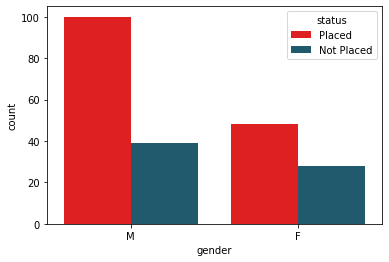

##################################################
ssc_b
Central    0.539535
Others     0.460465
Name: ssc_b, dtype: float64


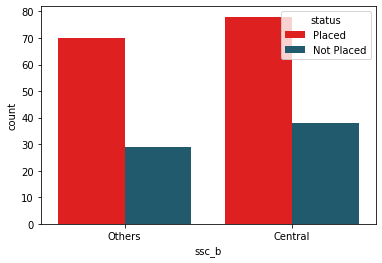

##################################################
hsc_b
Others     0.609302
Central    0.390698
Name: hsc_b, dtype: float64


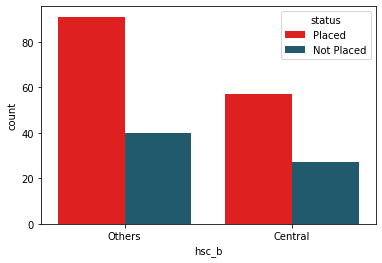

##################################################
hsc_s
Commerce    0.525581
Science     0.423256
Arts        0.051163
Name: hsc_s, dtype: float64


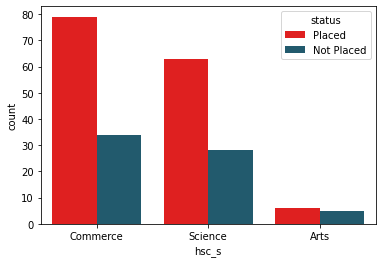

##################################################
degree_t
Comm&Mgmt    0.674419
Sci&Tech     0.274419
Others       0.051163
Name: degree_t, dtype: float64


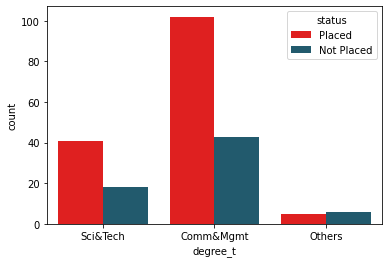

##################################################
workex
No     0.655814
Yes    0.344186
Name: workex, dtype: float64


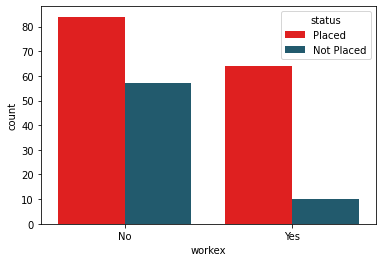

##################################################
specialisation
Mkt&Fin    0.55814
Mkt&HR     0.44186
Name: specialisation, dtype: float64


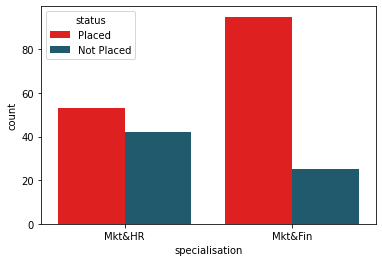

##################################################
status
Placed        0.688372
Not Placed    0.311628
Name: status, dtype: float64


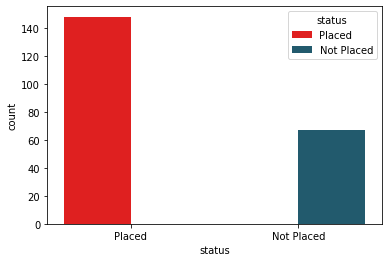

##################################################


In [7]:
cat = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']
for i in cat:
    print(i)
    print(df[i].value_counts(normalize = True))
    sns.countplot(x=i, hue = 'status',data=df, palette = ['red','#15607A'])
    plt.show()
    print('#'*50)

In [8]:
#sl_no is the index, it wont help us in the prediction so, lets drop it
df.drop('sl_no', axis =1 , inplace=True)

In [9]:
df['total_edu']  = df['ssc_p'] + df['hsc_p']  + df['degree_p'] 

In [10]:
df['total_mba']  = df['etest_p'] + df['mba_p']

In [11]:
#df['gender'] = df['gender'].apply(lambda x : 1 if x == 'M' else 0 )

#df['workex'] = df['workex'].apply(lambda x : 1 if x ==  'Yes' else 0 )

df['status'] = df['status'].apply(lambda x : 1 if x ==  'Placed' else 0 )

#df['specialisation'] = df['specialisation'].apply(lambda x : 1 if x ==  'Mkt&Fin' else 0 )

#df['hsc_b'] = df['hsc_b'].apply(lambda x : 1 if x ==  'Central' else 0 )

In [12]:
df['ssc_p'] = df['ssc_p'].apply(lambda x : 1 if x >60 else 0 )
df['hsc_p'] = df['hsc_p'].apply(lambda x : 1 if x >60 else 0 )
df['degree_p'] = df['degree_p'].apply(lambda x : 1 if x >60 else 0 )

In [13]:
df['status'].value_counts(normalize = True)

1    0.688372
0    0.311628
Name: status, dtype: float64

In [14]:
data = pd.get_dummies(df,drop_first = True)

In [15]:
data

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,total_edu,total_mba,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,1,1,0,55.0,58.80,1,216.00,113.80,1,1,1,1,0,0,1,0,1
1,1,1,1,86.5,66.28,1,235.14,152.78,1,0,1,0,1,0,1,1,0
2,1,1,1,75.0,57.80,1,197.00,132.80,1,0,0,0,0,0,0,0,0
3,0,0,0,66.0,59.43,0,160.00,125.43,1,0,0,0,1,0,1,0,1
4,1,1,1,96.8,55.50,1,232.70,152.30,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,1,1,91.0,74.49,1,240.20,165.49,1,1,1,1,0,0,0,0,0
211,0,0,1,74.0,53.62,1,190.00,127.62,1,1,1,0,1,0,1,0,0
212,1,1,1,59.0,69.72,1,207.00,128.72,1,1,1,1,0,0,0,1,0
213,1,1,0,70.0,60.23,1,198.00,130.23,0,1,1,1,0,0,0,0,1


### Train- Test Split

In [77]:
X = data.drop(['status'],axis = 1)
y = data['status']

#creating the train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, stratify=y, test_size=0.30)

In [78]:
print('X train shape is: ',X_train.shape)
print('y train shape is: ',y_train.shape)
print('X test shape is: ',X_test.shape)
print('y test shape is: ',y_test.shape)

X train shape is:  (150, 16)
y train shape is:  (150,)
X test shape is:  (65, 16)
y test shape is:  (65,)


In [79]:
dt_model = DecisionTreeClassifier(random_state = 100)
dt_model.fit(X_train,y_train) 

DecisionTreeClassifier(random_state=100)

In [80]:
dt_model.score(X_train, y_train)

1.0

In [81]:
dt_model.score(X_test, y_test)

0.7846153846153846

In [82]:
# using HPT

In [83]:
def metrics(dt):
    print('X train')
    X_train_pred = dt.predict(X_train)
    print('accuracy score is:', round(accuracy_score(X_train_pred,y_train),2))
    print('recall score is:', round(recall_score(X_train_pred,y_train),2))
    print('precision score is:', round(precision_score(X_train_pred,y_train),2))
    print('F1 score is:', round(f1_score(X_train_pred,y_train),2))
    print('Confusion Matrix is : \n',confusion_matrix(X_train_pred,y_train))
    
    print('#'*50)

    print('X test')
    X_test_pred = dt.predict(X_test)
    print('accuracy score is:', round(accuracy_score(y_test,X_test_pred),2))
    print('recall score is:', round(recall_score(y_test,X_test_pred),2))
    print('precision score is:', round(precision_score(y_test,X_test_pred),2))
    print('F1 score is:', round(f1_score(y_test,X_test_pred),2))
    print('Confusion Matrix is : \n',confusion_matrix(y_test,X_test_pred))

In [84]:
%%time
## Tuning it with HPT
classifier_dt = DecisionTreeClassifier(random_state=100)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [ 3, 4, 5, 7,9,10],
    'min_samples_leaf': [10, 15, 20, 25,30],
    'max_features': [2,3,4,5,6,7,8], 
    'min_samples_split' : [5,10,15,20],
    'max_leaf_nodes' : [5,7,9]
     
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_dt, param_grid=params,n_jobs=-1, cv=5, verbose=1, scoring = "f1")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2520 candidates, totalling 12600 fits
Wall time: 54.8 s


In [85]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=3, max_features=7, max_leaf_nodes=5,
                       min_samples_leaf=15, min_samples_split=5,
                       random_state=100)


In [86]:
dt_best = grid_search.best_estimator_

In [87]:
metrics(dt_best)

X train
accuracy score is: 0.82
recall score is: 0.9
precision score is: 0.83
F1 score is: 0.86
Confusion Matrix is : 
 [[37 17]
 [10 86]]
##################################################
X test
accuracy score is: 0.8
recall score is: 0.89
precision score is: 0.83
F1 score is: 0.86
Confusion Matrix is : 
 [[12  8]
 [ 5 40]]


In [66]:
dt_best.feature_importances_

array([0.69530145, 0.        , 0.        , 0.        , 0.02998157,
       0.27471698, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [88]:
df_features = pd.DataFrame({'names': X.columns, 'importance':dt_best.feature_importances_})

df_features.sort_values(by='importance',ascending=False)

,names,importance
0,ssc_p,0.706378
2,degree_p,0.209385
5,total_edu,0.084237
1,hsc_p,0.000000
3,etest_p,0.000000
4,mba_p,0.000000
6,total_mba,0.000000
7,gender_M,0.000000
8,ssc_b_Others,0.000000
9,hsc_b_Others,0.000000


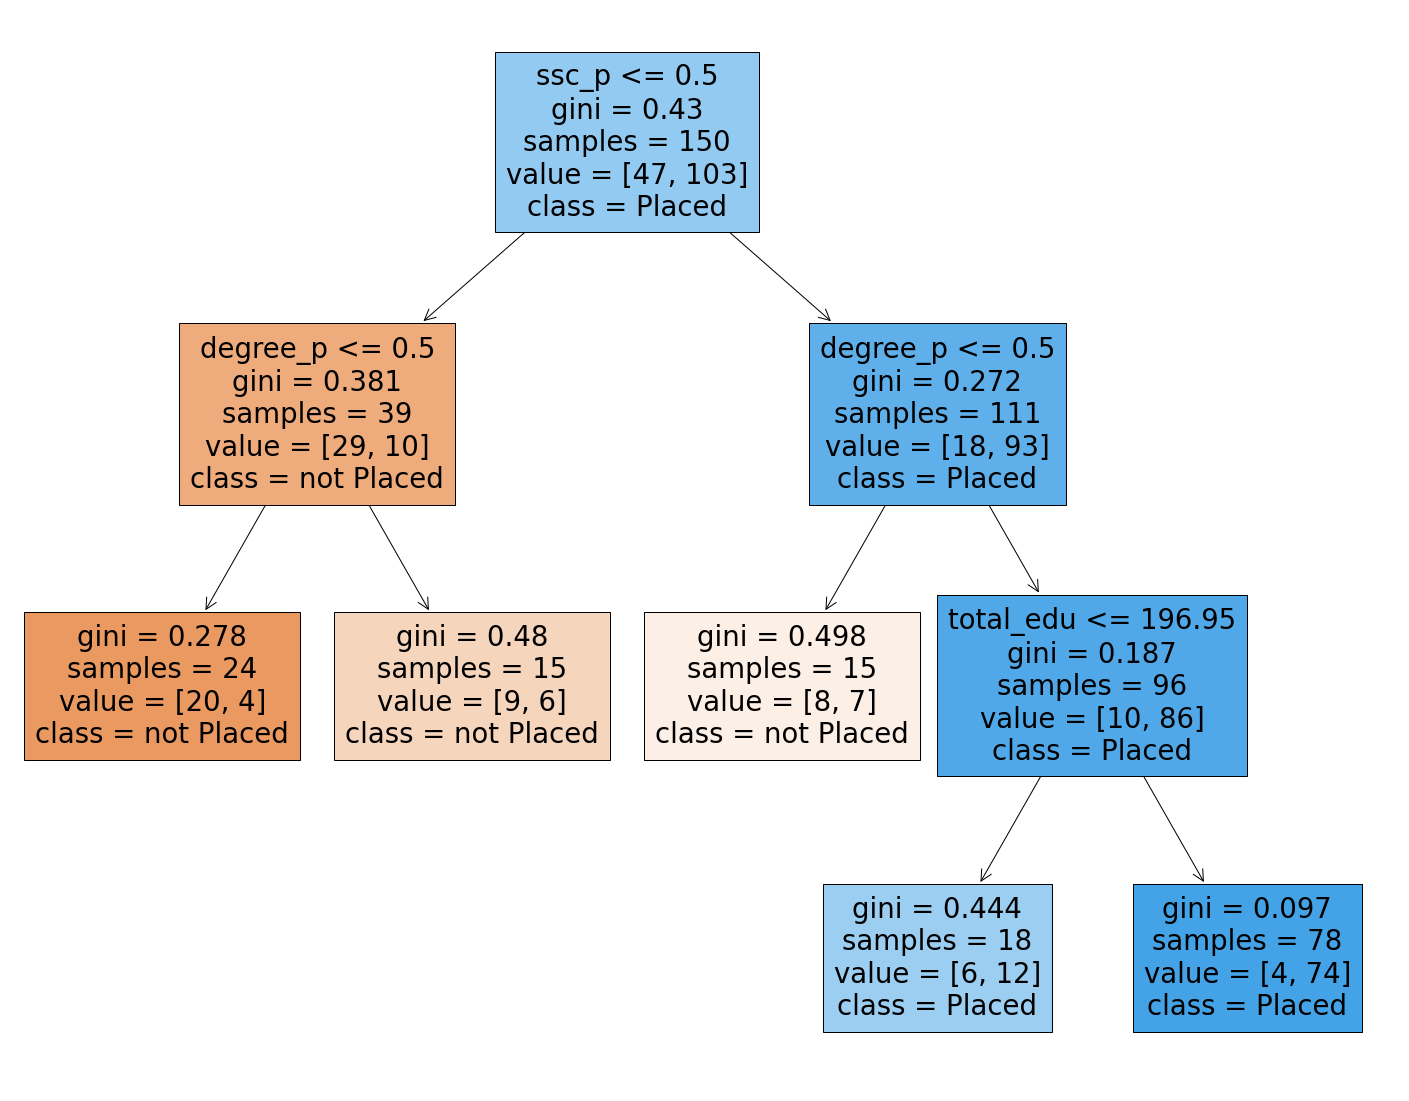

In [89]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt_best, filled=True, class_names=['not Placed','Placed'], feature_names=X.columns)
plt.show()
